In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [3]:
file_path = "extremely_messy_data_v3.csv"  
#this is the file path, used file 'extremely_messy_data_v3.csv', which is the messed file.
df = pd.read_csv(file_path)
df.head()

,X2017.NAICS.Code,X2017.NAICS.Title,GHG,Unit,Supply.Chain.Emission.Factors.without.Margins,Margins.of.Supply.Chain.Emission.Factors,Supply.Chain.Emission.Factors.with.Margins,Reference.USEEIO.Code,2017 NAICS Title
0,425120.0,Wholesale Trade Agents and Brokers,All GHGs,mg CO2e/kg,0.092,0.000,0.092,425000,NaN
1,336419.0,Other Guided Missile and Space Vehicle Parts a...,All GHGs#,"kg CO2e/2022 USD, purchaser pric&",0.286,0.007,0.294,33641A,NaN
2,337124.0,Metal Household Furniture Manufacturing,All GHGs#,ton CO2e,0.168,0.060,0.230,33712N,NaN
3,337127.0,Institutional Furniture Manufacturin%,All GHGs%,ton CO2e,0.208,0.038,0.246,33712#,NaN
4,561440.0,Collection Agencies%,All GHGs#,ton CO2e#,0.111,0.000,0.111,561400,NaN


In [4]:
df.rename(columns=lambda x: x.lstrip('X') if x.startswith('X') else x, inplace=True)
df.iloc[:, 0] = pd.to_numeric(df.iloc[:, 0], errors='coerce').abs()
df = df[(df.iloc[:, 0] <= 1_000_000) & df.iloc[:, 0].notna()]
df.iloc[:, 0] = df.iloc[:, 0].map('{:,.0f}'.format)

special_chars = r"[#@&*%!]"  
df.iloc[:, 1] = df.iloc[:, 1].astype(str).str.replace(special_chars, "", regex=True)
df.iloc[:, 2] = df.iloc[:, 2].astype(str).str.replace(special_chars, "", regex=True)

df.iloc[:, 3] = "kg CO2e/2022 USD, purchaser price"

df.iloc[:, 4:7] = df.iloc[:, 4:7].apply(pd.to_numeric, errors='coerce')
df = df[(df.iloc[:, 4].abs() <= 10) & 
        (df.iloc[:, 5].abs() <= 10) & 
        (df.iloc[:, 6].abs() <= 10)]

def pad_code(value):
    match = re.match(r"(\d+)([A-Z]*)", value)  
    if match:
        num_part, letter_part = match.groups()
        total_length = len(num_part) + len(letter_part)
        if total_length < 6:
            num_part = num_part.ljust(6 - len(letter_part), '0')  
        return num_part + letter_part
    return value  

col_idx = 7
df.iloc[:, col_idx] = df.iloc[:, col_idx].astype(str).str.replace(r"[#@&*!]", "", regex=True)
df.iloc[:, col_idx] = df.iloc[:, col_idx].apply(pad_code)


df = df.iloc[:, :-1]

df = df.sort_values(by=df.columns[0], ascending=True)
df = df.reset_index(drop=True)
df.iloc[:, 4:7] = df.iloc[:, 4:7].abs()

df.head()

/var/folders/m2/2jnx6gsx3ll9y85qkq7j12z00000gn/T/ipykernel_51799/3318931075.py:12: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 4:7] = df.iloc[:, 4:7].apply(pd.to_numeric, errors='coerce')


,2017.NAICS.Code,2017.NAICS.Title,GHG,Unit,Supply.Chain.Emission.Factors.without.Margins,Margins.of.Supply.Chain.Emission.Factors,Supply.Chain.Emission.Factors.with.Margins,Reference.USEEIO.Code
0,"111,110",Soybean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.000,0.532,11110A
1,"111,120",Oilseed (except Soybean) Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,11110A
2,"111,150",Corn Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.850,11110B
3,"111,160",Rice Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.000,0.848,11110B
4,"111,191",Oilseed and Grain Combination Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.000,0.850,11110B


In [5]:
#this is the code I download the cleaned data. 
#(No longer need to run since dataset is now in datasets folder)
# df.to_csv("cleaned_data_vf.csv", index=False, encoding="utf-8")

In [7]:
file_path = "cleaned_data_vf.csv"
df = pd.read_csv(file_path)
df.head()

,2017.NAICS.Code,2017.NAICS.Title,GHG,Unit,Supply.Chain.Emission.Factors.without.Margins,Margins.of.Supply.Chain.Emission.Factors,Supply.Chain.Emission.Factors.with.Margins,Reference.USEEIO.Code
0,"111,110",Soybean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.000,0.532,11110A
1,"111,120",Oilseed (except Soybean) Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,11110A
2,"111,150",Corn Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.850,11110B
3,"111,160",Rice Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.000,0.848,11110B
4,"111,191",Oilseed and Grain Combination Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.000,0.850,11110B


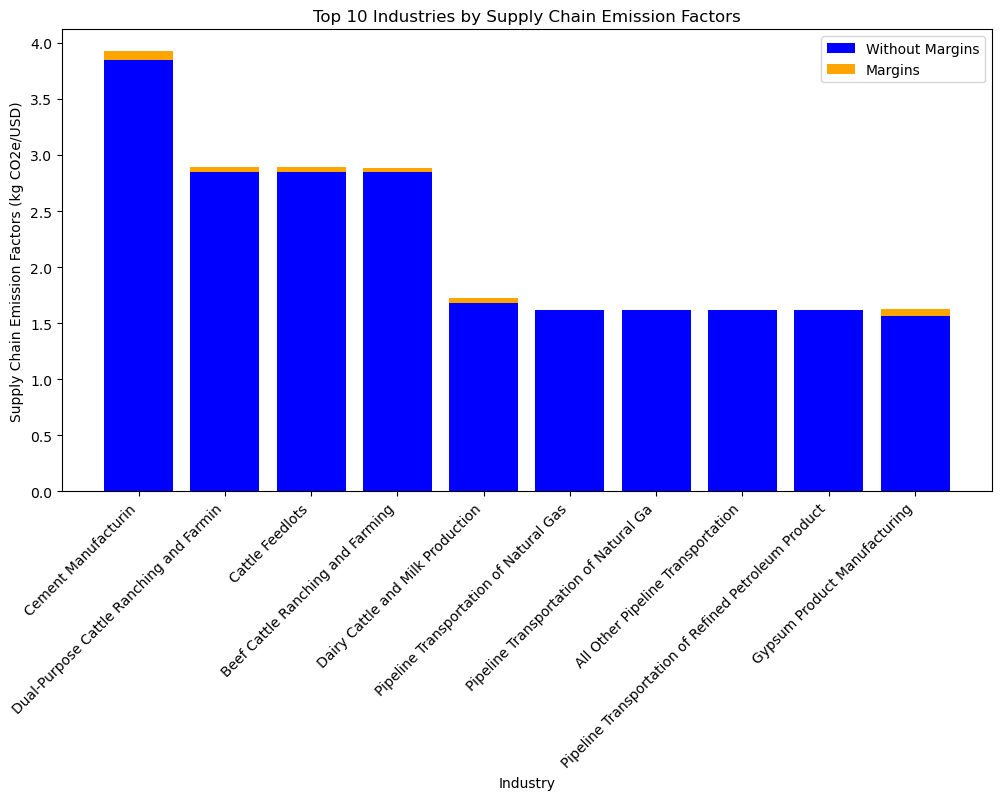

In [8]:
#1. Top 10 industries with the highest Supply Chain Emission Factors

top_n = 10  
df_sorted = df.sort_values(by=df.columns[4], ascending=False).head(top_n)
industry_names = df_sorted.iloc[:, 1]

plt.figure(figsize=(12, 6))
plt.bar(industry_names, df_sorted.iloc[:, 4], label="Without Margins", color="blue")
plt.bar(industry_names, df_sorted.iloc[:, 5], label="Margins", color="orange", bottom=df_sorted.iloc[:, 4])

plt.xlabel("Industry")
plt.ylabel("Supply Chain Emission Factors (kg CO2e/USD)")
plt.title(f"Top {top_n} Industries by Supply Chain Emission Factors")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.show()

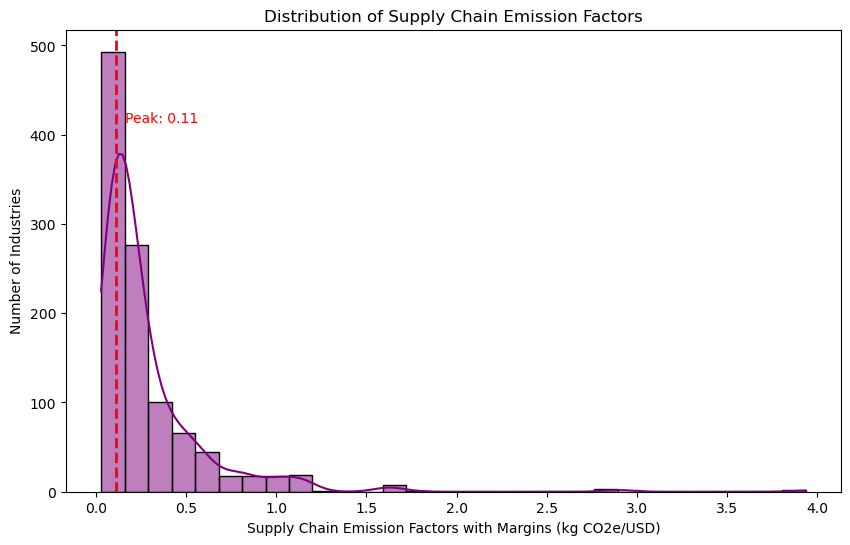

In [9]:
#2.	Analysis of the distribution of supply chain emission factors across industries
plt.figure(figsize=(10, 6))
sns.histplot(df.iloc[:, 6], bins=30, kde=True, color="purple")  # Supply Chain Emission Factors with Margins
peak_value = df.iloc[:, 6].mode()[0]
plt.axvline(peak_value, color='red', linestyle='dashed', linewidth=2)
plt.text(peak_value + 0.05, plt.ylim()[1] * 0.8, f'Peak: {peak_value:.2f}', color='red')
plt.xlabel("Supply Chain Emission Factors with Margins (kg CO2e/USD)")
plt.ylabel("Number of Industries")
plt.title("Distribution of Supply Chain Emission Factors")
plt.show()

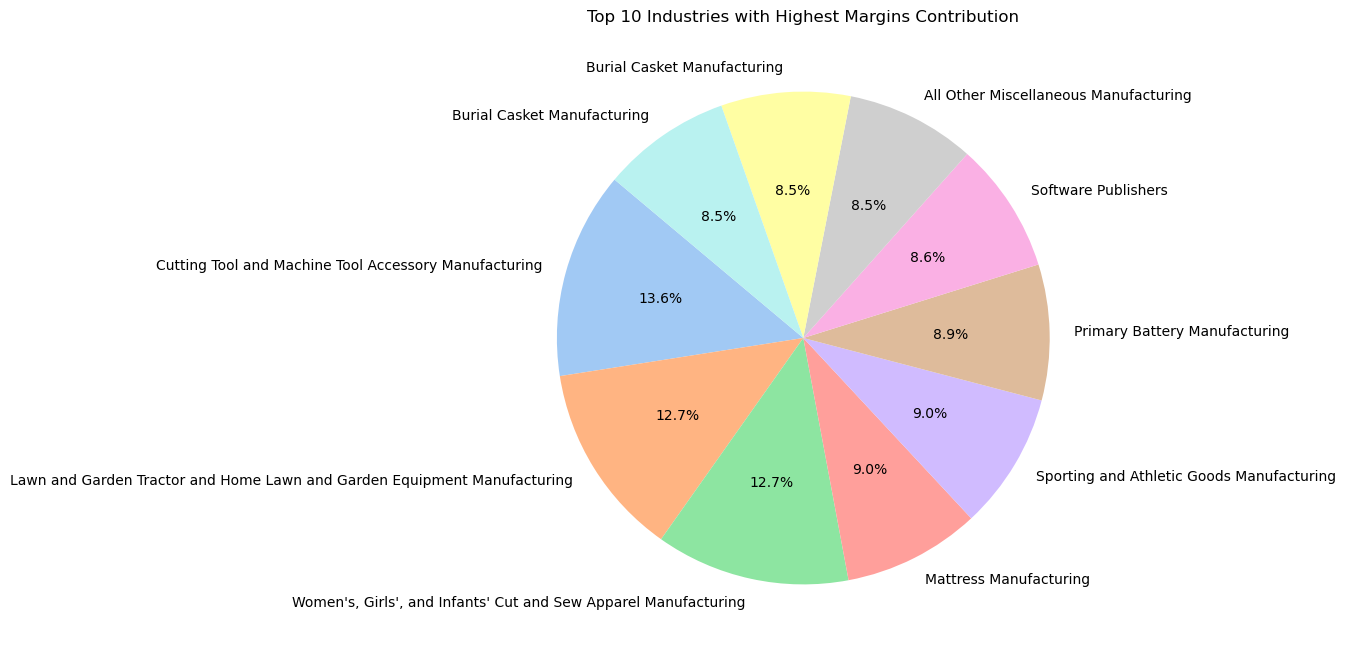

In [10]:
#3.	Top 10 industries of margins of Supply Chain Emission Factors
df["Margins Percentage"] = (df.iloc[:, 5] / df.iloc[:, 6]) * 100
df_top_margins = df.sort_values(by="Margins Percentage", ascending=False).head(10)
plt.figure(figsize=(8, 8))
plt.pie(df_top_margins["Margins Percentage"], labels=df_top_margins.iloc[:, 1], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))

plt.title("Top 10 Industries with Highest Margins Contribution")
plt.show()

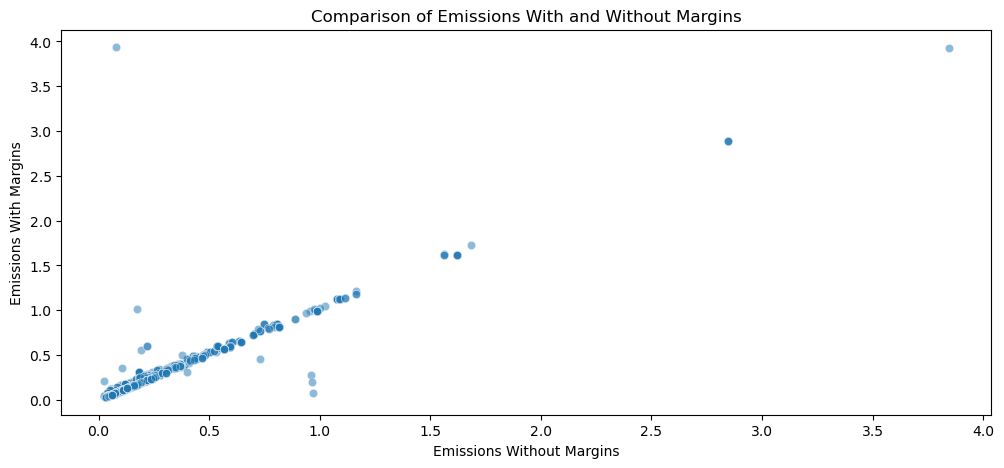

In [11]:
#4.	Comparison of Emissions with and Without Margins
plt.figure(figsize=(12, 5))
sns.scatterplot(
    x=df["Supply.Chain.Emission.Factors.without.Margins"], 
    y=df["Supply.Chain.Emission.Factors.with.Margins"], 
    alpha=0.5
)
plt.xlabel("Emissions Without Margins")
plt.ylabel("Emissions With Margins")
plt.title("Comparison of Emissions With and Without Margins")
plt.show()

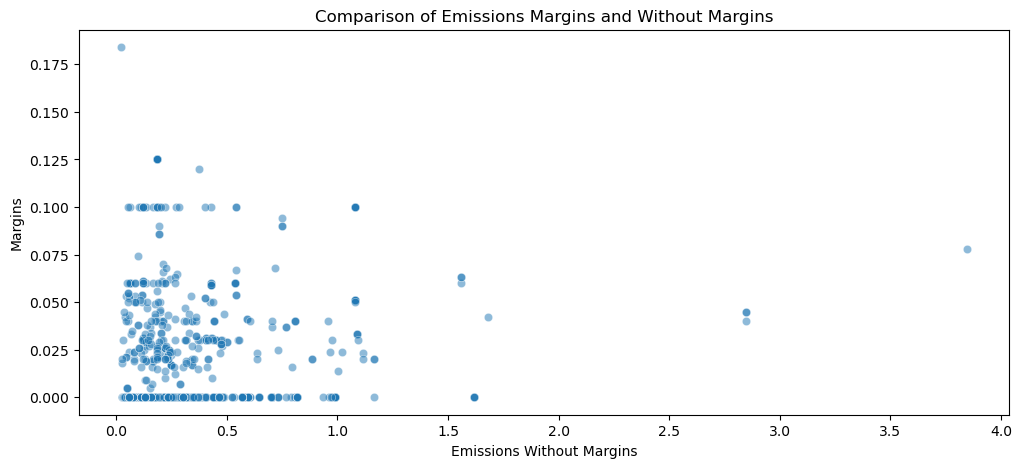

In [12]:
#5.	Comparison of Emissions of and Without Margins
plt.figure(figsize=(12, 5))
sns.scatterplot(
    x=df["Supply.Chain.Emission.Factors.without.Margins"], 
    y=df["Margins.of.Supply.Chain.Emission.Factors"], 
    alpha=0.5
)
plt.xlabel("Emissions Without Margins")
plt.ylabel("Margins")
plt.title("Comparison of Emissions Margins and Without Margins")
plt.show()

                                        OLS Regression Results                                        
Dep. Variable:     Supply.Chain.Emission.Factors.with.Margins   R-squared:                       0.058
Model:                                                    OLS   Adj. R-squared:                  0.057
Method:                                         Least Squares   F-statistic:                     65.63
Date:                                        Wed, 19 Feb 2025   Prob (F-statistic):           1.48e-15
Time:                                                18:18:03   Log-Likelihood:                -320.58
No. Observations:                                        1067   AIC:                             645.2
Df Residuals:                                            1065   BIC:                             655.1
Df Model:                                                   1                                         
Covariance Type:                                    nonrobust            

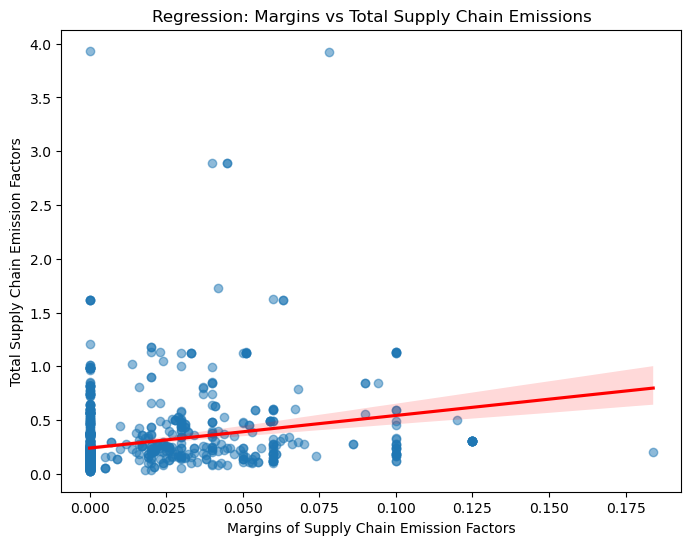

In [13]:
#regression

# Extracting data
X = df.iloc[:, 5]  # Margins of Supply Chain Emission Factors
y = df.iloc[:, 6]  # Total Supply Chain Emission Factors

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

plt.figure(figsize=(8, 6))
sns.regplot(x=df.iloc[:, 5], y=df.iloc[:, 6], scatter_kws={"alpha":0.5}, line_kws={"color":"red"})

plt.xlabel("Margins of Supply Chain Emission Factors")
plt.ylabel("Total Supply Chain Emission Factors")
plt.title("Regression: Margins vs Total Supply Chain Emissions")
plt.show()

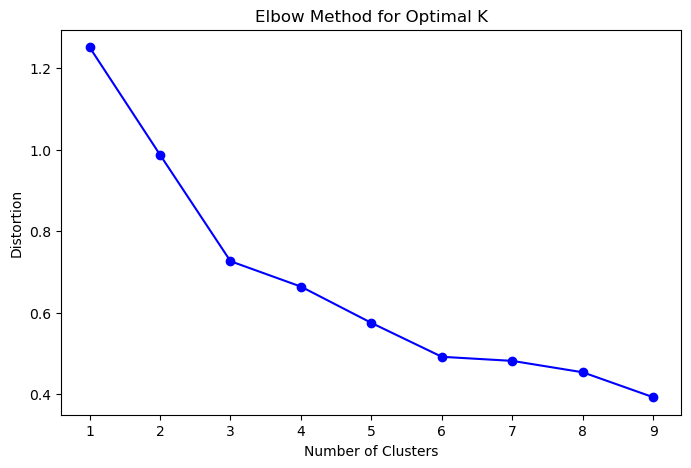

In [14]:
#cluster 1

features = df.iloc[:, 4:7]  #  Supply Chain Emission Factors without/with Margins and Margins

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

distortions = []
K = range(1, 10) 
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    distortions.append(sum(np.min(cdist(scaled_features, kmeans.cluster_centers_, 'euclidean'), axis=1)) / scaled_features.shape[0])

plt.figure(figsize=(8, 5))
plt.plot(K, distortions, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

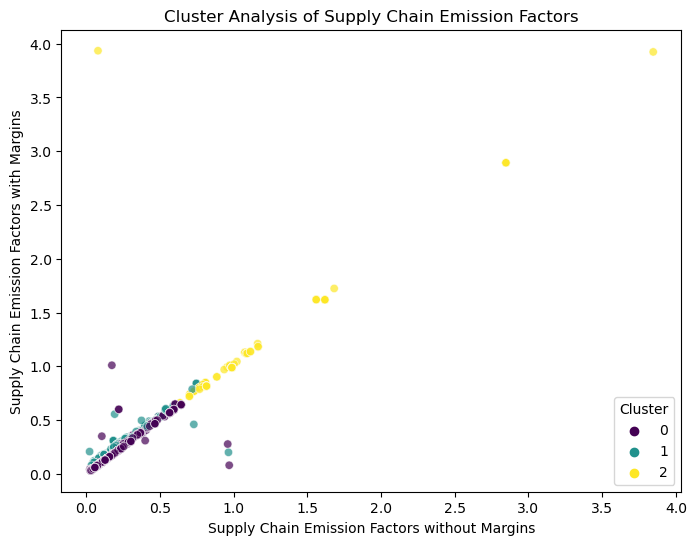

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.iloc[:, 4], y=df.iloc[:, 6], hue=df['Cluster'], palette='viridis', alpha=0.7)
plt.xlabel("Supply Chain Emission Factors without Margins")
plt.ylabel("Supply Chain Emission Factors with Margins")
plt.title("Cluster Analysis of Supply Chain Emission Factors")
plt.legend(title="Cluster")
plt.show()

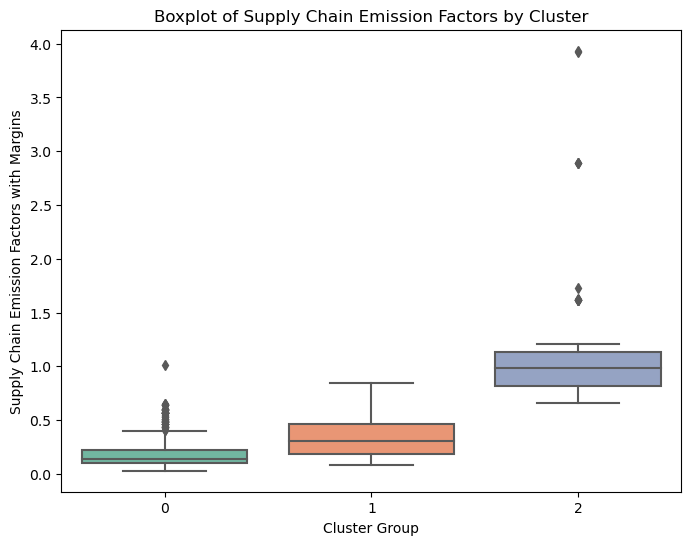

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Cluster'], y=df.iloc[:, 6], palette="Set2")
plt.xlabel("Cluster Group")
plt.ylabel("Supply Chain Emission Factors with Margins")
plt.title("Boxplot of Supply Chain Emission Factors by Cluster")
plt.show()


In [17]:
#cluster 2
df["Margins_Percentage"] = df["Margins.of.Supply.Chain.Emission.Factors"] / df["Supply.Chain.Emission.Factors.with.Margins"].replace(0, float("nan"))
df["Margins_Percentage"].fillna(0, inplace=True)

def classify_industry(industry_title):
    industry_title = str(industry_title).lower()  
    if any(x in industry_title for x in ["cement", "steel", "oil", "coal"]):
        return "Energy-Intensive"
    elif any(x in industry_title for x in ["apparel", "luxury", "fashion", "software"]):
        return "High-Value"
    elif any(x in industry_title for x in ["consulting", "it", "finance", "law"]):
        return "Low-Emission"
    else:
        return "Other"
df["Industry_Category"] = df["2017.NAICS.Title"].apply(classify_industry)
df = pd.get_dummies(df, columns=["Industry_Category"], drop_first=False)
df.head()


,2017.NAICS.Code,2017.NAICS.Title,GHG,Unit,Supply.Chain.Emission.Factors.without.Margins,Margins.of.Supply.Chain.Emission.Factors,Supply.Chain.Emission.Factors.with.Margins,Reference.USEEIO.Code,Margins Percentage,Cluster,Margins_Percentage,Industry_Category_Energy-Intensive,Industry_Category_High-Value,Industry_Category_Low-Emission,Industry_Category_Other
0,"111,110",Soybean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.000,0.532,11110A,0.000000,0,0.000000,0,0,0,1
1,"111,120",Oilseed (except Soybean) Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,11110A,8.270677,1,0.082707,1,0,0,0
2,"111,150",Corn Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.850,11110B,4.705882,2,0.047059,0,0,0,1
3,"111,160",Rice Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.000,0.848,11110B,0.000000,2,0.000000,0,0,0,1
4,"111,191",Oilseed and Grain Combination Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.000,0.850,11110B,0.000000,2,0.000000,1,0,0,0


/Users/obioraokeke/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


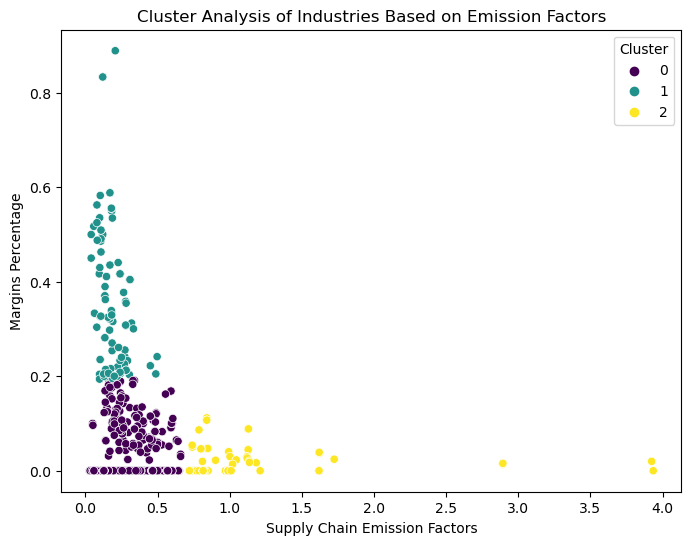

In [18]:
X = df[["Supply.Chain.Emission.Factors.with.Margins", "Margins_Percentage"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df["Supply.Chain.Emission.Factors.with.Margins"],
    y=df["Margins_Percentage"],
    hue=df["Cluster"],
    palette="viridis"
)
plt.xlabel("Supply Chain Emission Factors")
plt.ylabel("Margins Percentage")
plt.title("Cluster Analysis of Industries Based on Emission Factors")
plt.show()
